### Text Classification with ML
+ assigning text to their predefined category or class
+ grouping text into their classes

+ Using Udemy Dataset
+ Predict the subject/category of course title


### Workflow
+ EDA
+ Building Features From the Text
    - Vectorization (Tfidf,CountVectorizer)
+ Model Building
    - Single Approach
    - Pipeline Approach
    
+ Model Evaluation
+ Model Interpretation
+ Productionize Model

In [1]:
# Load EDA Pkgs
import pandas as pd
import neattext.functions as nfx

D:\shanu_user\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\shanu_user\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\shanu_user\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load Data Viz
import seaborn as sns

In [3]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [4]:
# Load Dataset
df = pd.read_csv("udemy_courses.csv")

In [5]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [6]:
# Shape
df.shape

(3683, 12)

In [7]:
df[['course_title','subject']]

,course_title,subject
0,Ultimate Investment Banking Course,Business Finance
1,Complete GST Course & Certification - Grow You...,Business Finance
2,Financial Modeling for Business Analysts and C...,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance
4,How To Maximize Your Profits Trading Options,Business Finance
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Web Development
3679,How To Design A WordPress Website With No Codi...,Web Development
3680,Learn and Build using Polymer,Web Development
3681,CSS Animations: Create Amazing Effects on Your...,Web Development


### Text Preprocessing
+ Reduce Noise
    - Punct
    - Special Char
    - Stopword
+ Lemmatization/Stemming

In [8]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
df['course_title'].apply(nfx.remove_stopwords)

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678     Learn jQuery Scratch - Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681       CSS Animations: Create Amazing Effects Website
3682            MODX CMS Build Websites: Beginner's Guide
Name: course_title, Length: 3683, dtype: object

In [10]:
# Remove stopwords
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [11]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [12]:
# Remove special characters
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [13]:
# Reduce to lowercase
df['clean_course_title'] = df['clean_course_title'].str.lower()

In [14]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options
...,...,...
3678,learn jquery scratch master javascript library,Learn jQuery from Scratch - Master of JavaScri...
3679,design wordpress website coding,How To Design A WordPress Website With No Codi...
3680,learn build polymer,Learn and Build using Polymer
3681,css animations create amazing effects website,CSS Animations: Create Amazing Effects on Your...


### Building Features From the Text
+ Convert words to vectors of number
+ Tfidf
+ Count
+ Hashvec

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [17]:
Xfeatures

0                      ultimate investment banking course
1       complete gst course  certification  grow practice
2        financial modeling business analysts consultants
3             beginner pro  financial analysis excel 2017
4                        maximize profits trading options
                              ...                        
3678      learn jquery scratch  master javascript library
3679                      design wordpress website coding
3680                                  learn build polymer
3681        css animations create amazing effects website
3682              modx cms build websites beginners guide
Name: clean_course_title, Length: 3683, dtype: object

In [18]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [19]:
X

<3683x3564 sparse matrix of type '<class 'numpy.float64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [20]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# Convert to DF
#df_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

df_vec = pd.DataFrame(X.todense(), columns=tfidf_vec.get_feature_names_out())

In [23]:
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Building Models
+ Single Approach*
    - Separately
+ Pipeline
    -Combine

In [24]:
# Split our dataset
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [26]:
x_train.shape

(2578, 3564)

In [27]:
# Build Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
# Acccuracy
lr_model.score(x_test,y_test)

0.9547511312217195

In [29]:
### Evaluate our model

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
y_pred = lr_model.predict(x_test)

In [33]:
# Confusion Matrix : true pos,false pos,etc
confusion_matrix(y_pred,y_test)

array([[382,  20,   8,   5],
       [  1, 142,   0,   2],
       [  1,   1, 183,   0],
       [  2,   9,   1, 348]], dtype=int64)

In [34]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

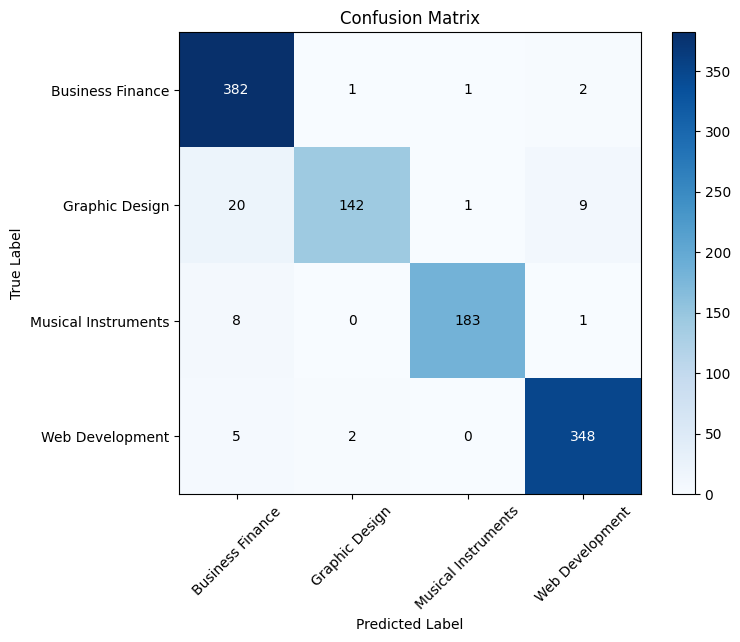

In [40]:
#plot_confusion_matrix(lr_model,x_test,y_test,xticks_rotation=40)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming lr_model has been trained
y_pred = lr_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names (if applicable)
class_names = ['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development']  # Replace with your actual class names

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

if class_names:
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()


In [41]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.92      0.95       415
     Graphic Design       0.83      0.98      0.90       145
Musical Instruments       0.95      0.99      0.97       185
    Web Development       0.98      0.97      0.97       360

           accuracy                           0.95      1105
          macro avg       0.94      0.96      0.95      1105
       weighted avg       0.96      0.95      0.96      1105



In [42]:
### Making A Single Prediction
ex = "Building A Simple ML Web App"

In [43]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [44]:
vectorize_text(ex)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [45]:
sample1 = vectorize_text(ex)

In [46]:
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [47]:
# Prediction Prob
lr_model.predict_proba(sample1)

array([[0.0452693 , 0.03089783, 0.03488388, 0.88894899]])

In [48]:
lr_model.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

### Model Interpretation
+ Eli5
+ Lime
+ shap

In [50]:
# Assuming lr_model and tfidf_vec are defined and trained
feature_names = tfidf_vec.get_feature_names_out()
feature_weights = lr_model.coef_[0]  # Assuming binary classification, adjust if needed

# Combine feature names with their respective weights
feature_weights_dict = dict(zip(feature_names, feature_weights))

# Sort features by their weights
sorted_features = sorted(feature_weights_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print or process the sorted features as needed
for feature, weight in sorted_features:
    print(f"Feature: {feature}, Weight: {weight}")


Feature: trading, Weight: 4.380449304722855
Feature: financial, Weight: 3.402934128952528
Feature: accounting, Weight: 3.2715112223223897
Feature: forex, Weight: 2.9620857017191042
Feature: finance, Weight: 2.303671647539585
Feature: investing, Weight: 2.2490018025476797
Feature: trade, Weight: 2.2176478521776586
Feature: guitar, Weight: -2.0908507608997984
Feature: analysis, Weight: 2.0828102082234343
Feature: design, Weight: -2.067215657036504
Feature: photoshop, Weight: -2.0141282919762684
Feature: options, Weight: 1.9792169074371004
Feature: bitcoin, Weight: 1.963638883160358
Feature: piano, Weight: -1.89625152604429
Feature: bookkeeping, Weight: 1.874281827400451
Feature: stocks, Weight: 1.825150951242263
Feature: wordpress, Weight: -1.6808824142462762
Feature: cfa, Weight: 1.5933927511464911
Feature: javascript, Weight: -1.5733343479070416
Feature: web, Weight: -1.541904008921848
Feature: stock, Weight: 1.4632231717047302
Feature: management, Weight: 1.4426702761409433
Feature: m

In [59]:
# Assuming lr_model and tfidf_vec are already defined and fitted

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vec.get_feature_names_out()

# Get the coefficients (weights) from the logistic regression model
weights = lr_model.coef_[0]

# Create a DataFrame to associate feature names with their weights
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights})

# Sort the DataFrame by absolute weight value (for better visualization)
weights_df['Abs_Weight'] = weights_df['Weight'].abs()
weights_df = weights_df.sort_values(by='Abs_Weight', ascending=False)

# Print or display the DataFrame
print(weights_df)
weights_df

         Feature    Weight  Abs_Weight
3247     trading  4.380449    4.380449
1294   financial  3.402934    3.402934
126   accounting  3.271511    3.271511
1344       forex  2.962086    2.962086
1290     finance  2.303672    2.303672
...          ...       ...         ...
2053        math  0.000000    0.000000
2058    maximise  0.000000    0.000000
2060  maximizing  0.000000    0.000000
2064         mca  0.000000    0.000000
3563         zur  0.000000    0.000000

[3564 rows x 3 columns]


,Feature,Weight,Abs_Weight
3247,trading,4.380449,4.380449
1294,financial,3.402934,3.402934
126,accounting,3.271511,3.271511
1344,forex,2.962086,2.962086
1290,finance,2.303672,2.303672
...,...,...,...
2053,math,0.000000,0.000000
2058,maximise,0.000000,0.000000
2060,maximizing,0.000000,0.000000
2064,mca,0.000000,0.000000


In [62]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vec.get_feature_names_out()

# Get the coefficients (weights) from the logistic regression model
weights = lr_model.coef_[0]

# Create a DataFrame to display the features and their corresponding weights
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights})

# Sort the DataFrame by absolute weight value
weights_df['Absolute_Weight'] = weights_df['Weight'].abs()
weights_df = weights_df.sort_values(by='Absolute_Weight', ascending=False)

# Display the top features
top_features = weights_df.head(10)  # You can change the number of top features to display

print(top_features)


         Feature    Weight  Absolute_Weight
3247     trading  4.380449         4.380449
1294   financial  3.402934         3.402934
126   accounting  3.271511         3.271511
1344       forex  2.962086         2.962086
1290     finance  2.303672         2.303672
1754   investing  2.249002         2.249002
3242       trade  2.217648         2.217648
1508      guitar -2.090851         2.090851
209     analysis  2.082810         2.082810
930       design -2.067216         2.067216


In [65]:
# Assuming lr_model is your trained logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Get feature names
feature_names = tfidf_vec.get_feature_names_out()

# Get coefficients and intercepts
coefficients = lr_model.coef_
intercepts = lr_model.intercept_

# Define class names (if applicable)
class_names = ['Business Finance', 'Graphic Design', 'Musical Instruments', 'Web Development']  # Replace with your actual class names

# Print top features for each class
for i, class_name in enumerate(class_names):
    print(f"Top features for class '{class_name}':")
    class_coefficients = coefficients[i]
    sorted_indices = class_coefficients.argsort()[::-1]  # Sort indices by coefficient values in descending order
    top_features = [feature_names[idx] for idx in sorted_indices[:20]]  # Print top 15 features
    top_weights = class_coefficients[sorted_indices[:20]]  # Print corresponding weights
    for feature, weight in zip(top_features, top_weights):
        print(f"Weight: {weight:.3f}\tFeature: {feature}")
    print("\n")


Top features for class 'Business Finance':
Weight: 4.380	Feature: trading
Weight: 3.403	Feature: financial
Weight: 3.272	Feature: accounting
Weight: 2.962	Feature: forex
Weight: 2.304	Feature: finance
Weight: 2.249	Feature: investing
Weight: 2.218	Feature: trade
Weight: 2.083	Feature: analysis
Weight: 1.979	Feature: options
Weight: 1.964	Feature: bitcoin
Weight: 1.874	Feature: bookkeeping
Weight: 1.825	Feature: stocks
Weight: 1.593	Feature: cfa
Weight: 1.463	Feature: stock
Weight: 1.443	Feature: management
Weight: 1.424	Feature: market
Weight: 1.413	Feature: excel
Weight: 1.311	Feature: capital
Weight: 1.303	Feature: business
Weight: 1.288	Feature: trader


Top features for class 'Graphic Design':
Weight: 5.172	Feature: photoshop
Weight: 4.414	Feature: design
Weight: 2.938	Feature: illustrator
Weight: 2.742	Feature: adobe
Weight: 2.466	Feature: drawing
Weight: 2.084	Feature: draw
Weight: 1.932	Feature: logo
Weight: 1.635	Feature: graphic
Weight: 1.568	Feature: canva
Weight: 1.487	Featu

In [66]:
# Assuming lr_model has been trained and tfidf_vec is your TF-IDF vectorizer

# Get the coefficients (weights) from the logistic regression model
coefficients = lr_model.coef_[0]

# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vec.get_feature_names_out()

# Create a DataFrame to display the feature names and their corresponding weights
import pandas as pd

weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': coefficients})

# Sort the DataFrame by absolute weight value for better visualization
weights_df['Absolute Weight'] = weights_df['Weight'].abs()
weights_df = weights_df.sort_values(by='Absolute Weight', ascending=False).drop(columns='Absolute Weight')

# Display the top features and their weights
print(weights_df.head())


         Feature    Weight
3247     trading  4.380449
1294   financial  3.402934
126   accounting  3.271511
1344       forex  2.962086
1290     finance  2.303672


In [57]:
# Assuming lr_model has been trained and tfidf_vec is your TF-IDF vectorizer

# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vec.get_feature_names_out()

# Get the coefficients (weights) from the logistic regression model
coefficients = lr_model.coef_[0]

# Create a dictionary to store feature names and their corresponding weights
feature_weights = dict(zip(feature_names, coefficients))

# Print the feature weights
for feature, weight in feature_weights.items():
    print(f"{feature}: {weight}")


000005: 0.11293779867954946
001: 0.0
01: 0.2194044667400343
02: -0.03444895715042804
10: 0.19966385898061106
100: -0.011730594298107954
101: 0.24719515897198172
101master: 0.09804060600009987
102: 0.0
10k: 0.1345616796121823
10th: -0.01964726620667074
11: -0.061410626331292524
110: -0.07238549161229348
111creating: 0.0
112: -0.0886436254474309
12: -0.13157357752214793
123d: -0.06255266265780228
13: -0.10351204524953889
13customer: 0.0
14: -0.12713249025766202
15: -0.21462961342753334
150: 0.0
16: -0.045966689428197025
16propertyplant: 0.24541940318260425
17: -0.05531826687851146
175: 0.06388324101025676
175pa: 0.10882164881045289
18: 0.26053037449317107
183pa: 0.0
1872: 0.12550950088354854
188: 0.04241269750520274
19: -0.05389649975657687
1a: 0.0
1presentation: 0.0
1year: 0.04241269750520274
20: -0.38478769205866514
200: -0.09063358882835405
201: -0.07740779489081678
2012: -0.23906038199716748
2013: 0.0
20132016365: 0.0
2014: 0.3608160469053658
2015: 0.11366971939125887
20153: -0.04082

In [82]:
# Assuming lr_model is your logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Show feature weights
def show_weights(model, feature_names):
    weights = model.coef_[0]
    feature_weights = list(zip(feature_names, weights))
    sorted_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)
    
    for feature, weight in sorted_weights:
        print(f"Weight: {weight:.4f}\tFeature: {feature}")

# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vec.get_feature_names_out()

# Show feature weights
show_weights(lr_model, feature_names)


Weight: 4.9138	Feature: trading
Weight: 3.7714	Feature: accounting
Weight: 3.7354	Feature: financial
Weight: 3.3052	Feature: forex
Weight: 2.5544	Feature: trade
Weight: 2.5471	Feature: options
Weight: 2.4711	Feature: finance
Weight: 2.3703	Feature: investing
Weight: 2.2855	Feature: analysis
Weight: 2.1885	Feature: bitcoin
Weight: 2.0075	Feature: bookkeeping
Weight: 1.8870	Feature: cfa
Weight: 1.8182	Feature: stocks
Weight: 1.7071	Feature: stock
Weight: 1.6283	Feature: market
Weight: 1.5622	Feature: management
Weight: 1.5411	Feature: business
Weight: 1.5216	Feature: capital
Weight: 1.4795	Feature: excel
Weight: 1.4741	Feature: tax
Weight: 1.4319	Feature: investment
Weight: 1.3660	Feature: economics
Weight: 1.3637	Feature: credit
Weight: 1.3478	Feature: trader
Weight: 1.3244	Feature: invest
Weight: 1.2397	Feature: strategy
Weight: 1.1953	Feature: technical
Weight: 1.0679	Feature: equity
Weight: 1.0572	Feature: contabilidad
Weight: 1.0552	Feature: modeling
Weight: 1.0186	Feature: accounts

In [83]:
# Assuming lr_model is your logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Get feature names
feature_names = tfidf_vec.get_feature_names_out()

# Get coefficients for each class
coefficients = lr_model.coef_

# Define class names (if applicable)
class_names = ['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development']  # Replace with your actual class names

# Print top features for each class
for i, class_name in enumerate(class_names):
    print(f"Top features for class '{class_name}':")
    class_coefficients = coefficients[i]
    sorted_indices = class_coefficients.argsort()[::-1]  # Sort indices by coefficient values in descending order
    top_features = [feature_names[idx] for idx in sorted_indices[:15]]  # Print top 15 features
    top_weights = class_coefficients[sorted_indices[:15]]  # Print corresponding weights
    for feature, weight in zip(top_features, top_weights):
        print(f"Weight: {weight:.3f}\tFeature: {feature}")
    print("\n")


Top features for class 'Business Finance':
Weight: 4.914	Feature: trading
Weight: 3.771	Feature: accounting
Weight: 3.735	Feature: financial
Weight: 3.305	Feature: forex
Weight: 2.554	Feature: trade
Weight: 2.547	Feature: options
Weight: 2.471	Feature: finance
Weight: 2.370	Feature: investing
Weight: 2.286	Feature: analysis
Weight: 2.188	Feature: bitcoin
Weight: 2.007	Feature: bookkeeping
Weight: 1.887	Feature: cfa
Weight: 1.818	Feature: stocks
Weight: 1.707	Feature: stock
Weight: 1.628	Feature: market


Top features for class 'Graphic Design':
Weight: 5.884	Feature: photoshop
Weight: 4.558	Feature: design
Weight: 3.396	Feature: illustrator
Weight: 2.920	Feature: adobe
Weight: 2.631	Feature: drawing
Weight: 2.548	Feature: draw
Weight: 2.176	Feature: logo
Weight: 2.083	Feature: graphic
Weight: 1.861	Feature: canva
Weight: 1.770	Feature: typography
Weight: 1.760	Feature: cc
Weight: 1.689	Feature: indesign
Weight: 1.668	Feature: designer
Weight: 1.536	Feature: 3d
Weight: 1.487	Feature: gi

In [89]:
# Assuming lr_model is your logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Show feature weights for each class
for i, class_name in enumerate(lr_model.classes_):
    print(f"Class: {class_name}")
    feature_weights = lr_model.coef_[i]
    sorted_indices = feature_weights.argsort()[::-1]  # Sort indices by weight in descending order
    top_features = [tfidf_vec.get_feature_names_out()[idx] for idx in sorted_indices[:15]]  # Print top 15 features
    top_weights = feature_weights[sorted_indices[:15]]  # Print corresponding weights
    for feature, weight in zip(top_features, top_weights):
        print(f"Weight: {weight:.3f}\tFeature: {feature}")
    print("\n")

# Show actual feature names
feature_names = tfidf_vec.get_feature_names_out()
print("Feature Names:")
print(", ".join(feature_names[:15]))  # Print the first 15 feature names



Class: Business Finance
Weight: 4.914	Feature: trading
Weight: 3.771	Feature: accounting
Weight: 3.735	Feature: financial
Weight: 3.305	Feature: forex
Weight: 2.554	Feature: trade
Weight: 2.547	Feature: options
Weight: 2.471	Feature: finance
Weight: 2.370	Feature: investing
Weight: 2.286	Feature: analysis
Weight: 2.188	Feature: bitcoin
Weight: 2.007	Feature: bookkeeping
Weight: 1.887	Feature: cfa
Weight: 1.818	Feature: stocks
Weight: 1.707	Feature: stock
Weight: 1.628	Feature: market


Class: Graphic Design
Weight: 5.884	Feature: photoshop
Weight: 4.558	Feature: design
Weight: 3.396	Feature: illustrator
Weight: 2.920	Feature: adobe
Weight: 2.631	Feature: drawing
Weight: 2.548	Feature: draw
Weight: 2.176	Feature: logo
Weight: 2.083	Feature: graphic
Weight: 1.861	Feature: canva
Weight: 1.770	Feature: typography
Weight: 1.760	Feature: cc
Weight: 1.689	Feature: indesign
Weight: 1.668	Feature: designer
Weight: 1.536	Feature: 3d
Weight: 1.487	Feature: gimp


Class: Musical Instruments
Weight

In [85]:
# Load Model Inter Pkg
import eli5

In [87]:
# SHow the Weight for each prediction
eli5.show_weights(lr_model)

In [101]:
tfidf_vec.get_feature_names()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [89]:
# See the actual word of the features
# Method 1
eli5.show_weights(lr_model,feature_names=tfidf_vec.get_feature_names())

In [90]:
# Method 2:
eli5.show_weights(lr_model,vec=tfidf_vec)

In [110]:
# Interpreting a Single Prediction
lr_model.predict(sample1)

array(['Business Finance'], dtype=object)

In [111]:
sample1

<1x3564 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [112]:
ex

'Building A Simple ML Web App'

In [114]:
# Assuming lr_model is your logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Predict using lr_model
predicted_class = lr_model.predict(sample1)

# Get probabilities
predicted_probabilities = lr_model.predict_proba(vectorize_text(ex))

# Display the predicted class and probabilities
print(f'Predicted class: {predicted_class[0]}')
print(f'Probabilities: {predicted_probabilities[0]}')  # Assuming it's a single class

# Assuming ex2 is an explanation generated using LIME
print(ex)




Predicted class: Business Finance
Probabilities: [0.03693799 0.02823712 0.02575288 0.90907201]
Building A Simple ML Web App


In [94]:
eli5.show_prediction(lr_model,ex,vec=tfidf_vec)

In [105]:
ex2 = 'Python tutorial for data science'

In [106]:
lr_model.predict(vectorize_text(ex2))

array(['Web Development'], dtype=object)

In [108]:
# Assuming lr_model is your logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Predict using lr_model
#predicted_class = lr_model.predict(sample1)
predicted_class = lr_model.predict(vectorize_text(ex2))
# Display the predicted class
print(f'Predicted class: {predicted_class[0]}')  # Assuming it's a single class

# Assuming ex is an explanation generated using LIME
print(ex2)



Predicted class: Web Development
Python tutorial for data science


In [109]:
# Assuming lr_model is your logistic regression model and tfidf_vec is your TF-IDF vectorizer

# Predict using lr_model
predicted_class = lr_model.predict(vectorize_text(ex2))

# Get probabilities
predicted_probabilities = lr_model.predict_proba(vectorize_text(ex2))

# Display the predicted class and probabilities
print(f'Predicted class: {predicted_class[0]}')
print(f'Probabilities: {predicted_probabilities[0]}')  # Assuming it's a single class

# Assuming ex2 is an explanation generated using LIME
print(ex2)


Predicted class: Web Development
Probabilities: [0.34429094 0.0968886  0.07157819 0.48724227]
Python tutorial for data science


In [132]:
ex2 = 'Python tutorial for data science'
ex1 = 'Building A Simple ML Web App'

ex3 = 'Play a piano'
ex4 = 'Building A Simple ML Web App'

ex5 = 'learn bitcoin'
ex6 = 'Building A Simple logo'

In [134]:

# Predict using lr_model
predicted_class = lr_model.predict(vectorize_text(ex6))

# Get probabilities
predicted_probabilities = lr_model.predict_proba(vectorize_text(ex6))

# Display the predicted class and probabilities
print(f'Predicted class: {predicted_class[0]}')
print(f'Probabilities: {predicted_probabilities[0]}')  # Assuming it's a single class

# Assuming ex2 is an explanation generated using LIME
print(ex6)


Predicted class: Graphic Design
Probabilities: [0.21919521 0.38454897 0.13646632 0.2597895 ]
Building A Simple logo


In [97]:
eli5.show_prediction(lr_model,ex2,vec=tfidf_vec)

In [119]:
# Save Model
import joblib

In [120]:
model_file = open("lr_model_for_udemy_course_prediction_06_feb_2021.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [121]:
### Method 2: Pipeline Approach
# Transformers
tf_vec = TfidfVectorizer()
# Estimators
lr_clf = LogisticRegression()
nv_clf = MultinomialNB()

In [122]:
from sklearn.pipeline import make_pipeline,Pipeline

In [123]:
pipe_lr = make_pipeline(tf_vec,lr_clf)

In [124]:
pipe_nv = make_pipeline(tf_vec,nv_clf)  

In [125]:
# Steps
pipe_lr.steps

[('tfidfvectorizer', TfidfVectorizer()),
 ('logisticregression', LogisticRegression())]

In [126]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [127]:
x_train2

3068                                 getting started html
2889       web security common vulnerabilities mitigation
3338                 introduction qgis python programming
168     accounting basics 66 minutes absolutely beginners
3414         complete login registration system php mysql
                              ...                        
1130                                complete forex trader
1294                   santa claus photoshop manipulation
860     cfa level foundation introduction financial re...
3507                             professional css flexbox
3174           supercharging development atom text editor
Name: clean_course_title, Length: 2578, dtype: object

In [128]:
# Fit Our dataset
pipe_lr = pipe_lr.fit(x_train2,y_train2)

In [129]:
pipe_lr.score(x_test2,y_test2)

0.9601809954751132

In [130]:
# Fit Our dataset
pipe_nv = pipe_nv.fit(x_train2,y_train2)
pipe_nv.score(x_test2,y_test2)

0.9420814479638009

In [131]:
pipe_nv.predict([ex])

array(['Web Development'], dtype='<U19')